# Loading the Data and Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
warnings.filterwarnings("ignore")

In [2]:
ColumnNames = ["class_label","lepton pT", "lepton eta", "lepton phi", 
                                     "missing energy magnitude", "missing energy phi", 
                                     "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", 
                                     "jet 2 pt", "jet 2 eta", "jet 2 phi", "jet 2 b-tag", 
                                     "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", 
                                     "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", #21 low-level features
                                     "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"] # 7 high-level features
DataFrame = pd.read_csv("HIGGS.csv",names=ColumnNames)

# Data Investigation

In [3]:
DataFrame.head() #contents of the data with the "header" added

,class_label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


<AxesSubplot:>

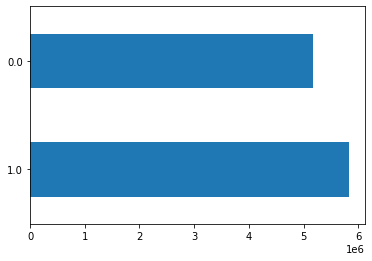

In [4]:
DataFrame.class_label.value_counts().plot(kind='barh')

In [5]:
DataFrame.info() #Looking to data types and amounts of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   class_label               float64
 1   lepton pT                 float64
 2   lepton eta                float64
 3   lepton phi                float64
 4   missing energy magnitude  float64
 5   missing energy phi        float64
 6   jet 1 pt                  float64
 7   jet 1 eta                 float64
 8   jet 1 phi                 float64
 9   jet 1 b-tag               float64
 10  jet 2 pt                  float64
 11  jet 2 eta                 float64
 12  jet 2 phi                 float64
 13  jet 2 b-tag               float64
 14  jet 3 pt                  float64
 15  jet 3 eta                 float64
 16  jet 3 phi                 float64
 17  jet 3 b-tag               float64
 18  jet 4 pt                  float64
 19  jet 4 eta                 float64
 20  jet 4 phi             

In [6]:
names = list(DataFrame.columns) 
print(names[2])

lepton eta


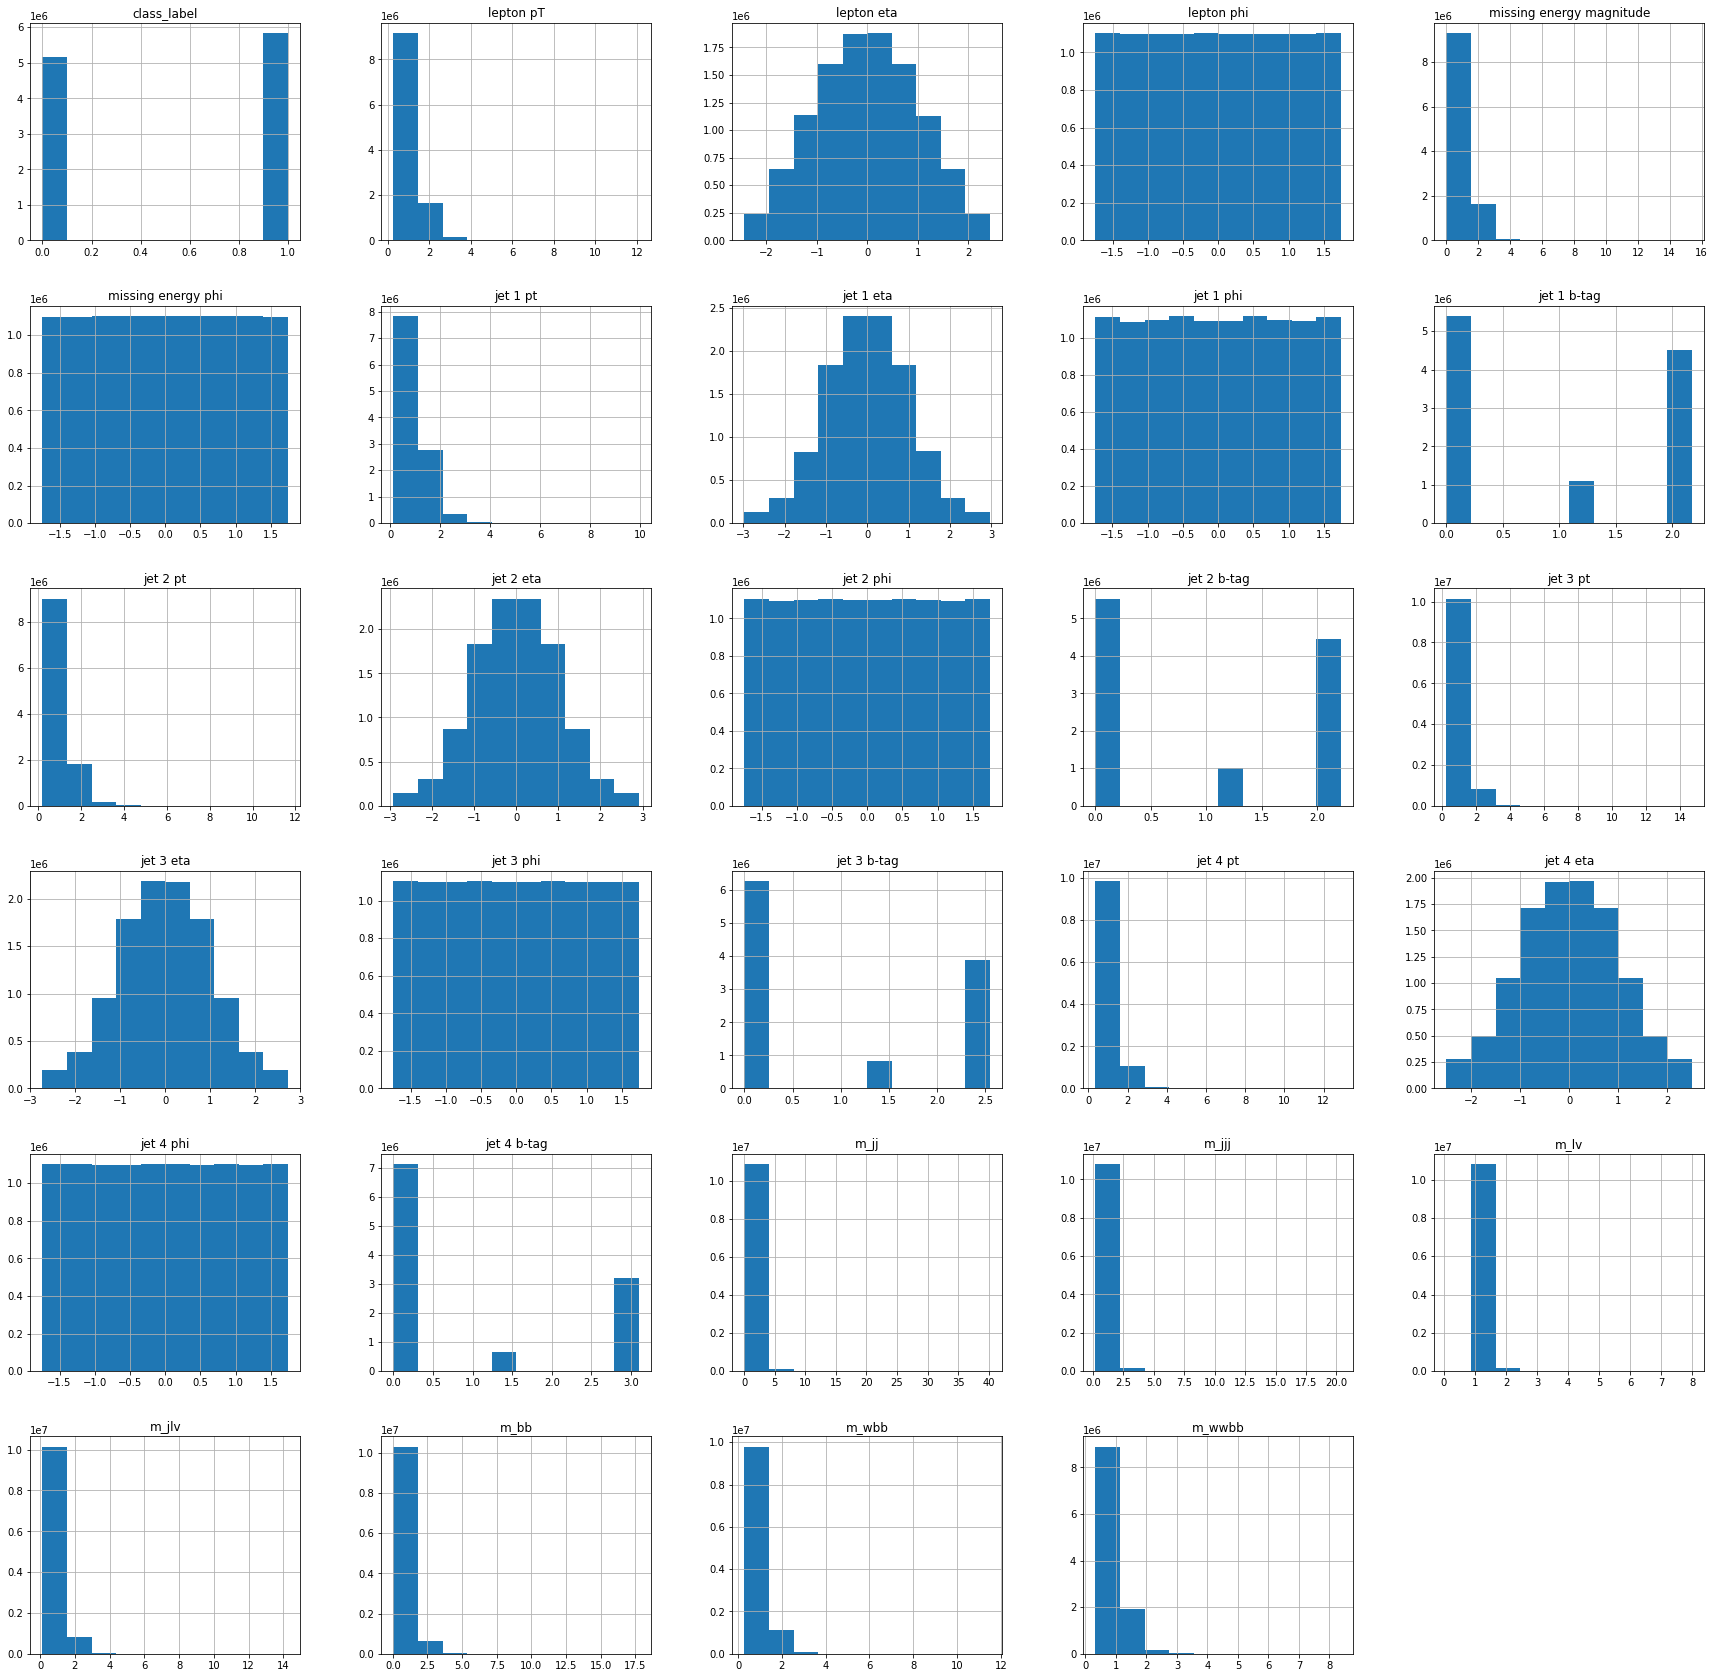

In [7]:
DataFrame.hist(figsize=(30,30));

In [11]:
DataFrame.describe() # statistical information about our data

,class_label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


# Pairplot for "class label" - Higgs or not Higgs
Too much labels for the plot (just look at the correlation matrix below)

In [ ]:
#sns.pairplot(DataFrame)
#             palette="husl",
#             hue="class_label",
#             height=1.5,
#             vars=ColumnNames)

#plt.suptitle("Pair Plot of Data Without Std. Dev. Fields",fontsize=18)

#plt.tight_layout()
#plt.show()   # pairplot without standard deviaton fields of data

# Correlation Matrix

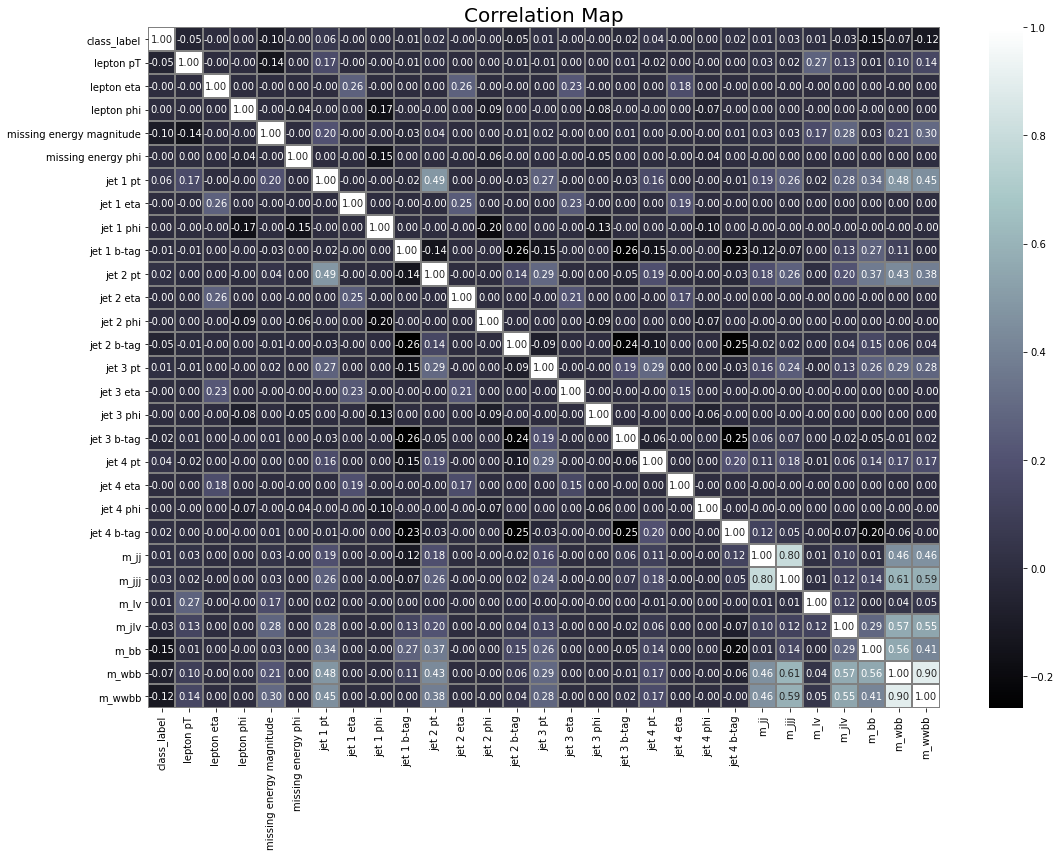

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(data=DataFrame.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()      # lightest and darkest cells are most correlated ones

# Data Preparation

In [13]:
labels = DataFrame.class_label.values

DataFrame.drop(["class_label"],axis=1,inplace=True)

features = DataFrame.values

In [14]:
features.shape

(11000000, 28)

In [15]:
features[0:2]

array([[ 8.69293213e-01, -6.35081828e-01,  2.25690261e-01,
         3.27470064e-01, -6.89993203e-01,  7.54202247e-01,
        -2.48573139e-01, -1.09206390e+00,  0.00000000e+00,
         1.37499213e+00, -6.53674185e-01,  9.30349112e-01,
         1.10743606e+00,  1.13890433e+00, -1.57819831e+00,
        -1.04698539e+00,  0.00000000e+00,  6.57929540e-01,
        -1.04545699e-02, -4.57671694e-02,  3.10196137e+00,
         1.35376000e+00,  9.79563117e-01,  9.78076160e-01,
         9.20004845e-01,  7.21657455e-01,  9.88750935e-01,
         8.76678348e-01],
       [ 9.07542109e-01,  3.29147279e-01,  3.59411865e-01,
         1.49796987e+00, -3.13009530e-01,  1.09553063e+00,
        -5.57524920e-01, -1.58822978e+00,  2.17307615e+00,
         8.12581182e-01, -2.13641927e-01,  1.27101457e+00,
         2.21487212e+00,  4.99993950e-01, -1.26143181e+00,
         7.32156157e-01,  0.00000000e+00,  3.98700893e-01,
        -1.13893008e+00, -8.19110195e-04,  0.00000000e+00,
         3.02219898e-01,  8.33

In [16]:
labels.shape

(11000000,)

# Train/Test Dataset Construction

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.5)

In [18]:
x_train.shape

(5500000, 28)

In [19]:
x_train[0:2]

array([[ 0.67017931, -1.94409585,  1.40532541,  1.09139621, -1.29903984,
         1.60450029, -0.84766227,  1.6577431 ,  1.08653808,  1.12658453,
         0.72179085,  0.42933777,  0.        ,  1.38284242,  1.86709309,
         0.07590429,  0.        ,  1.22287762, -0.66172236, -0.59624243,
         0.        ,  0.94293052,  0.52498639,  0.98733807,  1.62350094,
         1.03778934,  1.1772989 ,  1.30330348],
       [ 2.59671593, -1.01200771, -1.03783429,  0.06667545, -1.46192849,
         1.24952233, -0.89816397, -0.46672571,  1.08653808,  3.04119897,
        -0.68281543,  1.08514667,  0.        ,  0.62292892, -2.11797571,
         1.40338588,  0.        ,  1.81971192, -0.12122007,  0.5725078 ,
         1.55098069,  2.00014257,  1.51657629,  0.99613577,  0.91808885,
         1.42794299,  1.53642702,  1.40454125]])

In [20]:
x_test.shape

(5500000, 28)

In [21]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(features))
#print(normalizer.mean.numpy())

# (1) Linear Regression

In [22]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1,input_shape=(28,),use_bias=True)
])
#linear_model.predict(features)

In [23]:
lin_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam'
)
linear_model.compile(
    optimizer=lin_optimizer,
    loss='mse', #Mean Square Error
    metrics=['mae','mse'] #Mean Absolute Error(MAE) and Mean Square Error(MSE)
)

In [24]:
# Early stopping mechanism
# -> A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
#  If for more than Idle_epochs epochs, our improvement is less than min_delta=0.01, then the training should be stopped 
Idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=Idle_epochs, min_delta=0.01)

class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, mae {:.2f}, val_mae {:.2f}, mse {:.2f}, val_mse {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['mae'], logs['val_mae'],logs['mse'], logs['val_mse']))
    
log_display = NEPOCHLogger(per_epoch=100)

In [25]:
n_epochs=2000
hist = linear_model.fit(
    x=x_train, y=y_train,
    epochs=n_epochs,
    #suppress logging
    verbose=0,
    shuffle=True,
    batch_size=256, #determines the number of samples for minibatch optimization
    callbacks=[earlyStopping,log_display],
    #validation_data=(x_test, y_test)
    #calculate validation results on 30% of the training data
    validation_split = 0.3
)

Epoch 0, loss 0.23, val_loss 0.23, mae 0.45, val_mae 0.45, mse 0.23, val_mse 0.23
Epoch 100, loss 0.23, val_loss 0.23, mae 0.45, val_mae 0.45, mse 0.23, val_mse 0.23


In [26]:
linear_model.evaluate(x_test,y_test)

171875/171875 [==============================] - 111s 648us/step - loss: 0.2338 - mae: 0.4541 - mse: 0.2338A: 0s - loss: 0.2338 - mae: 0.4541 - mse: 0.2


[0.23380282521247864, 0.45409563183784485, 0.23380282521247864]

In [27]:
linear_model.save(r'./linearRegressionHiggs.hdf5') #save the model for future use

In [28]:
print('keys:', hist.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


# Result Visualization

Text(0, 0.5, 'Loss: Mean Absolute Error')

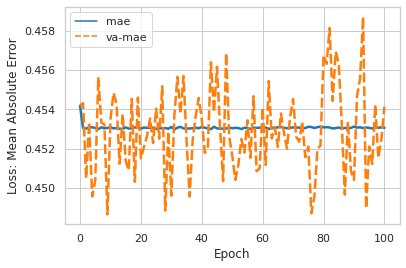

In [29]:
#  << Mean Absolute Error(MAE) >>
# Returning the desired values for plotting and turn to numpy array
mae = np.asarray(hist.history['mae'])
val_mae = np.asarray(hist.history['val_mae'])
# Creating the data frame
num_values = (len(mae))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mae
values[:,1] = val_mae
# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mae", "va-mae"])
# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss: Mean Absolute Error')

Text(0, 0.5, 'Loss: Mean Square Error')

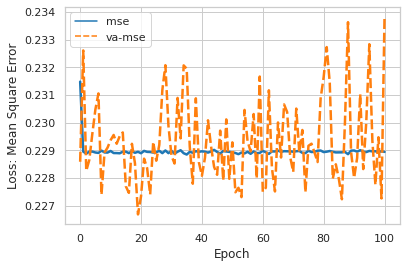

In [30]:
#  << Mean Square Error(MSE) >>
# Returning the desired values for plotting and turn to numpy array
mse = np.asarray(hist.history['mse'])
val_mse = np.asarray(hist.history['val_mse'])
# Creating the data frame
num_values = (len(mse))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mse
values[:,1] = val_mse
# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["mse", "va-mse"])
# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss: Mean Square Error')

# Prediction of Classification Line for the Model

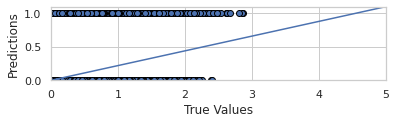

In [34]:
predictions = linear_model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(predictions, y_test, edgecolors=(0, 0, 0))
plt.xlabel('True Values')
plt.ylabel('Predictions')
xlims = [0, 5]
ylims = [0, 1.1]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

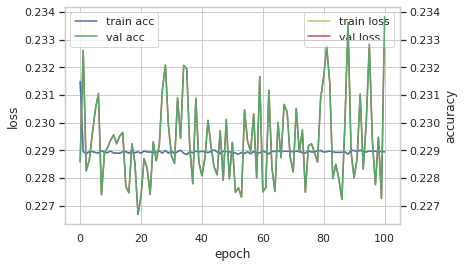

In [45]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

#loss_ax.set_yscale('log')
#acc_ax.set_yscale('log')

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mse'], 'b', label='train acc')
acc_ax.plot(hist.history['val_mse'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist['']
#hist.tail()

# (2) Logistic Regression

In [46]:
logistic_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1,input_shape=(28,),activation='sigmoid')
])

In [47]:
Idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=Idle_epochs, min_delta=0.01)

class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, binary_accuracy {:.2f}, val_binary_accuracy {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['binary_accuracy'], logs['val_binary_accuracy']))
    
log_display = NEPOCHLogger(per_epoch=100)

In [48]:
logistic_model.compile(optimizer='sgd', 
                       loss='binary_crossentropy',
                       metrics=['binary_accuracy'])
n_epochs=2000
log_hist = logistic_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True, #whether to shuffle the data before moving to the next epoch
    callbacks=[earlyStopping,log_display],
    epochs=n_epochs, #how many times the training set is going to be used in training
    batch_size=256, #determines how many data samples are used to calculate gradient updates    
    #validation_data=(x_test, y_test),
    validation_split = 0.3,
    verbose=0
)

Epoch 0, loss 0.65, val_loss 0.64, binary_accuracy 0.63, val_binary_accuracy 0.64
Epoch 100, loss 0.64, val_loss 0.64, binary_accuracy 0.64, val_binary_accuracy 0.64


In [49]:
log_eval = logistic_model.evaluate(x=x_test,y=y_test)
log_eval

171875/171875 [==============================] - 114s 662us/step - loss: 0.6377 - binary_accuracy: 0.6415s - loss: 0.6376 - binary


[0.6376631259918213, 0.6414556503295898]

In [50]:
print('keys:', log_hist.history.keys())

keys: dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


# Result Visualization

Text(0, 0.5, 'Loss: Binary_CrossEntropy')

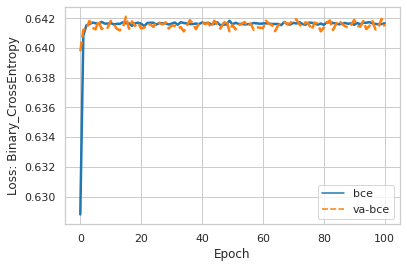

In [51]:
#  << Binary CrossEntropy >>
# Returning the desired values for plotting and turn to numpy array
bce = np.asarray(log_hist.history['binary_accuracy'])
val_bce = np.asarray(log_hist.history['val_binary_accuracy'])
# Creating the data frame
num_values = (len(bce))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = bce
values[:,1] = val_bce
# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["bce", "va-bce"])
# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss: Binary_CrossEntropy')

In [52]:
logistic_model.save(r'./logisticRegressionHiggs.hdf5') #save the model for future use

# Prediction of Classification Line for the Model

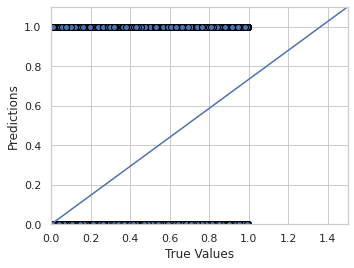

In [53]:
predictions = logistic_model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(predictions, y_test, edgecolors=(0, 0, 0))
plt.xlabel('True Values')
plt.ylabel('Predictions')
xlims = [0, 1.5]
ylims = [0, 1.1]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

In [ ]:
log_fig, log_loss_ax = plt.subplots()

log_acc_ax = log_loss_ax.twinx()

log_loss_ax.plot(log_hist.history['loss'], 'y', label='train loss')
log_loss_ax.plot(log_hist.history['val_loss'], 'r', label='val loss')

log_acc_ax.plot(log_hist.history['binary_accuracy'], 'b', label='train acc')
log_acc_ax.plot(log_hist.history['val_binary_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
log_acc_ax.set_ylabel('accuracy')

log_loss_ax.legend(loc='upper left')
log_acc_ax.legend(loc='lower left')

plt.show()

# 